Plots the outputs for each SNP from the ../../results/2018_06_08/snps/ folder. The result is a scatter plot grouped by phewas code on the x-axis and a -log(p_value) on the y-axis.

In [1]:
# Import ggplot2 for graphs, dplyr for dataframes, and stringr for string manipulation.
library(ggplot2)
library(utils)
library(ggrepel)
library(dplyr, warn.conflicts = FALSE)
library(stringr)

In [2]:
# Read in all the SNPs
snps_df <- read.table("../../results/2018_06_08/combined/set_output.csv", sep = '\t')

# Load in grouping of phewas codes.
load(file = "../../data/2018_06_08_phewas_groups/pheinfo.rda")

# Convert the phecodes to numerics
pheinfo[,c("phecode")] <- as.numeric(pheinfo[,c("phecode")])

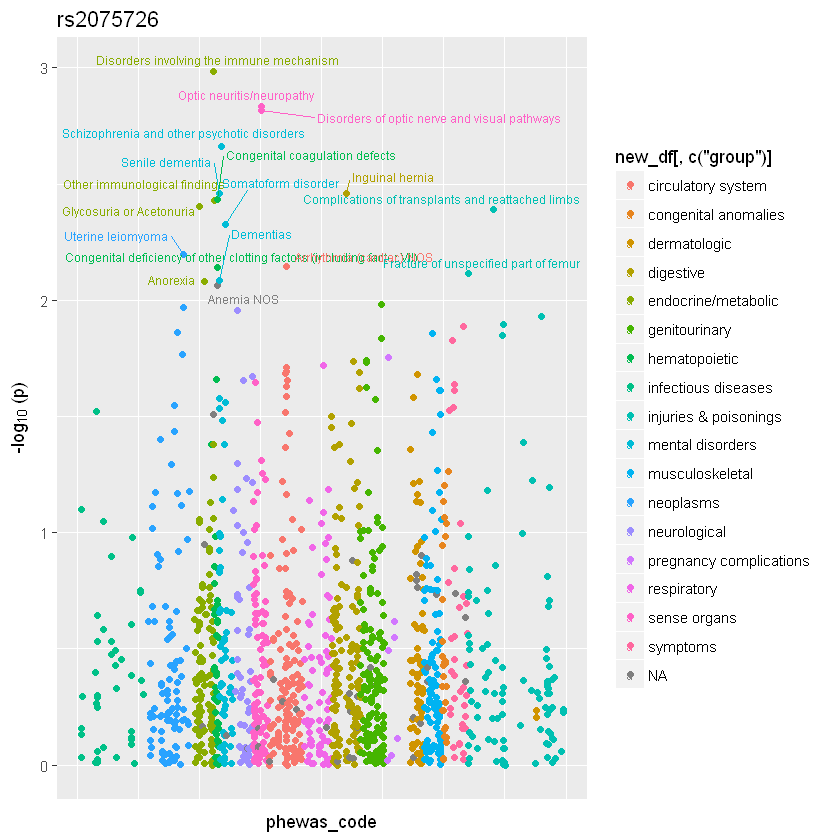

In [ ]:
# Iterate over all the SNPs in both the GWAS and PheWAS to create plots.
for (i in snps_df) {
  # Open the files for each SNP.
  cur_snp_str <-
    paste("../../results/2018_06_08/snps/", i, ".csv", sep = "")
  cur_snp_df <- read.csv(cur_snp_str, sep = '\t')
  
  # Make a copy to take the -log base 10 of the p-values.
  new_df <- cur_snp_df
  new_df[, c("p")] = -log(new_df[, c("p")], 10)
  
  # Merge the pheinfo dataframe with the dataframe with the SNP info on the phewas_code
  new_df <-
    merge(
      x = new_df,
      y = pheinfo,
      by.x = "phewas_code",
      by.y = "phecode",
      all.x = TRUE,
      sort = TRUE
    )
  
  # Print to notebook
  print(
    ggplot(new_df, aes(x = phewas_code, y = p)) +
      geom_point(aes(color = new_df[,c("group")])) +
      labs(y = expression('-log'[10] * ' (p)'), 
           title = i) +
      theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()) +
      geom_text_repel(
        aes(label = ifelse(p > 2, as.character(phewas_string), ''), color = new_df[,c("group")]),
        size = 2.5,
        hjust = 0.5,
        vjust = 1,
        force = 3
      )
  )  
    
  # Save to PNG file
  png_file_name <-
    paste("../../results/2018_06_08/plots/", i, ".png", sep = "")
  png(
    filename = png_file_name,
    width = 900,
    height = 900,
    res = 100
  )
  print(
    ggplot(new_df, aes(x = phewas_code, y = p)) +
      geom_point(aes(color = new_df[,c("group")])) +
      labs(y = expression('-log'[10] * ' (p)'), 
           title = i) +
      theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()) +
      geom_text_repel(
        aes(label = ifelse(p > 2, as.character(phewas_string), ''), color = new_df[,c("group")]),
        size = 2.5,
        hjust = 0.5,
        vjust = 1,
        force = 3
      )
  )
  dev.off()
}